In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

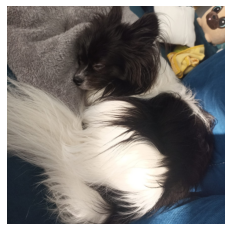

In [6]:

img = cv2.imread("hugo.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

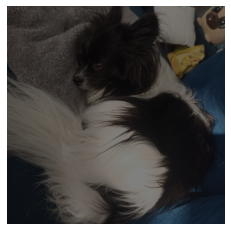

In [76]:
plt.axis('off')
plt.imshow(img//2)
plt.show()

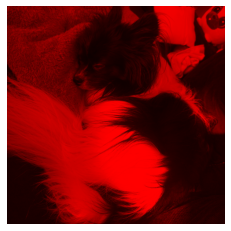

In [11]:
r = img.copy()
r[:, :, 1] = 0.5 * r[:, :, 1]
r[:, :, 2] = 0.5 * r[:, :, 2]
plt.axis('off')
plt.imshow(r)
plt.show()

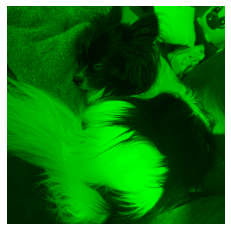

In [8]:
g = img.copy()
g[:, :, 0] = 0
g[:, :, 2] = 0
plt.axis('off')
plt.imshow(g)
plt.show()

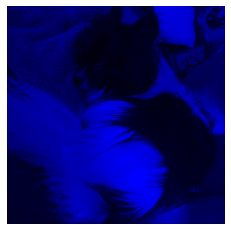

In [9]:
b = img.copy()
b[:, :, 0] = 0
b[:, :, 1] = 0
plt.axis('off')
plt.imshow(b)
plt.show()

## Suma obrazów

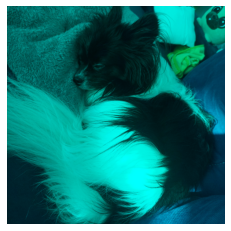

In [12]:
plt.axis('off')
plt.imshow(g+b)
plt.show()

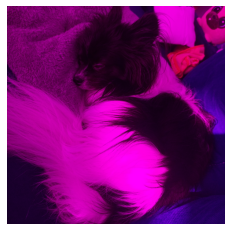

In [13]:
plt.axis('off')
plt.imshow(r+b)
plt.show()

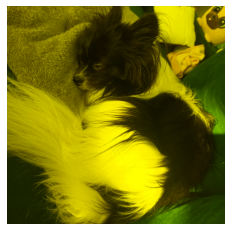

In [14]:
plt.axis('off')
plt.imshow(r+g)
plt.show()

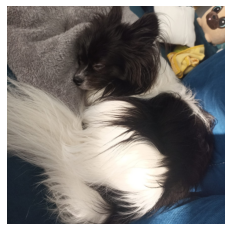

In [10]:
plt.axis('off')
plt.imshow((r+b+g))
plt.show()

# Translacja o wektor

$$
    \left[\begin{matrix}
    x' \\ y' \\ 1  
    \end{matrix}\right] = 
    \left[\begin{matrix}
    1 & 0 &t_x \\ 0 & 1 &t_y \\ 0 & 0 & 1 
    \end{matrix}\right] * 
    
    \left[\begin{matrix}
    x \\ y \\ 1  
    \end{matrix}\right]  
    
$$

$$ x' = x + t_x $$
$$ y' = y + t_y $$

In [63]:
t_x = 200
t_y = 200
Mt = np.float32([[1, 0, t_x],
                [0, 1, t_y],
                [0, 0, 1]])

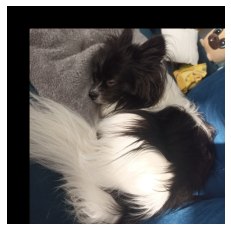

In [22]:
rows, cols, dim = img.shape
translated_img = cv2.warpPerspective(img, Mt, (cols + t_y, rows + t_x))
plt.axis('off')
plt.imshow(translated_img)
plt.show()

# Skalowanie

$$
    \left[\begin{matrix}
    x' \\ y' \\ 1  
    \end{matrix}\right] = 
    \left[\begin{matrix}
    s_x & 0 &0 \\ 0 & s_y & 0 \\ 0 & 0 & 1 
    \end{matrix}\right] * 
    
    \left[\begin{matrix}
    x \\ y \\ 1  
    \end{matrix}\right]  
    
$$

$$ x' = s_x *x $$
$$ y' = s_y* y $$

In [30]:
s_x = 0.75
s_y = 0.75
Ms = np.float32([[s_x, 0  , 0],
            	[0,   s_y, 0],
            	[0,   0,   1]])

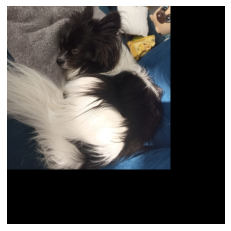

In [31]:
rows, cols, dim = img.shape
translated_img = cv2.warpPerspective(img, Ms, (cols, rows))
plt.axis('off')
plt.imshow(translated_img)
plt.show()

# Ścinanie obrazu (Shearing)

$$
    \left[\begin{matrix}
    x' \\ y' \\ 1  
    \end{matrix}\right] = 
    \left[\begin{matrix}
    1 & sh_x &0 \\ sh_y & 1 & 0 \\ 0 & 0 & 1 
    \end{matrix}\right] * 
    
    \left[\begin{matrix}
    x \\ y \\ 1  
    \end{matrix}\right]  
    
$$

$$ x' = x + sh_x * y$$
$$ y' = y + sh_y * x $$

In [38]:
sh_x = 0
sh_y = 0.5
Msh = np.float32([[1, sh_x  , 0],
            	[sh_y,   1, 0],
            	[0,   0,   1]])

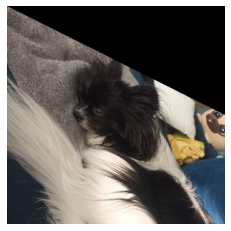

In [39]:
rows, cols, dim = img.shape
translated_img = cv2.warpPerspective(img, Msh, (cols, rows))
plt.axis('off')
plt.imshow(translated_img)
plt.show()

## Odbice lustrzane

- oś x
$$
    \left[\begin{matrix}
    x' \\ y' \\ 1  
    \end{matrix}\right] = 
    \left[\begin{matrix}
    1 & 0 &0 \\ 0 & -1 & rows \\ 0 & 0 & 1 
    \end{matrix}\right] * 
    
    \left[\begin{matrix}
    x \\ y \\ 1  
    \end{matrix}\right]  
    
$$
- oś y
$$
\left[\begin{matrix}
    x' \\ y' \\ 1  
    \end{matrix}\right] = 
    \left[\begin{matrix}
    -1 & 0 & cols \\ 0 & 1 & 0 \\ 0 & 0 & 1 
    \end{matrix}\right] * 
    
    \left[\begin{matrix}
    x \\ y \\ 1  
    \end{matrix}\right]  
$$

- oś x
$$ x' = x$$
$$ y' = -y + rows $$

- oś y
$$ x' = -x + cols$$
$$ y' = y  $$

In [41]:
rows, cols, dim = img.shape

Mx = np.float32([[1, 0  , 0],
            	[0,   -1, rows],
            	[0,   0,   1]])

My = np.float32([[-1, 0  , cols],
            	[0,   1, 0],
            	[0,   0,   1]])

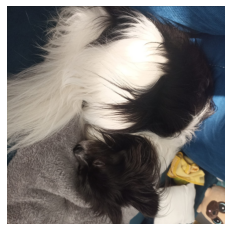

In [42]:
translated_img = cv2.warpPerspective(img, Mx, (cols, rows))
plt.axis('off')
plt.imshow(translated_img)
plt.show()

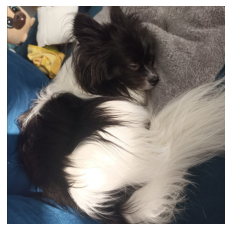

In [43]:
translated_img = cv2.warpPerspective(img, My, (cols, rows))
plt.axis('off')
plt.imshow(translated_img)
plt.show()

## Rotacja o zadany kąt

$$
\left[\begin{matrix}
    x' \\ y' \\ 1  
    \end{matrix}\right] = 
    \left[\begin{matrix}
    \cos(\alpha) & -\sin(\alpha) & 0 \\ \sin(\alpha)  & \cos(\alpha) & 0 \\ 0 & 0 & 1 
    \end{matrix}\right] * 
    
    \left[\begin{matrix}
    x \\ y \\ 1  
    \end{matrix}\right]  
$$

$$ x' = x* \cos(\alpha) - y*\sin(\alpha)$$
$$ y' = x* \sin(\alpha) + y*\cos(\alpha) $$

In [53]:
angle = np.radians(45)
Mr = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])

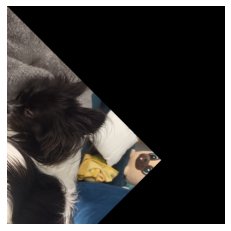

In [61]:
translated_img = cv2.warpPerspective(img, Mr, (cols, rows))
plt.axis('off')
plt.imshow(translated_img)
plt.show()

## Złoenie operacji

In [67]:
Mt

array([[  1.,   0., 200.],
       [  0.,   1., 200.],
       [  0.,   0.,   1.]], dtype=float32)

In [65]:
Ms

array([[0.75, 0.  , 0.  ],
       [0.  , 0.75, 0.  ],
       [0.  , 0.  , 1.  ]], dtype=float32)

Mt*p potem Ms*p

$$tp = Mt*p$$

$$sp = Ms*tp$$

$$sp = Ms*Mt*p$$

[[  0.75   0.   150.  ]
 [  0.     0.75 150.  ]
 [  0.     0.     1.  ]]


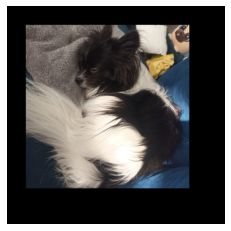

In [70]:
Mts = Ms @ Mt
print(Mts)
translated_img = cv2.warpPerspective(img, Mts, (cols, rows))
plt.axis('off')
plt.imshow(translated_img)
plt.show()

[[  0.75    0.    200.   ]
 [  0.375   0.75  300.   ]
 [  0.      0.      1.   ]]


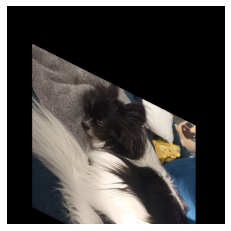

In [71]:
Msht = Msh @ Mt @ Ms

print(Msht)
translated_img = cv2.warpPerspective(img, Msht, (cols, rows))
plt.axis('off')
plt.imshow(translated_img)
plt.show()